<a href="https://colab.research.google.com/github/ns-0437/Traffic-Signal-Detection/blob/main/TraficSignal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
HOME = os.getcwd()
print(HOME)


/content


In [3]:
# Install Ultralytics YOLO
!pip install ultralytics==8.0.196

# Optional: Clean output
from IPython import display
display.clear_output()

# Check setup
import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.0.196 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.1/112.6 GB disk)


In [4]:
from ultralytics.nn.tasks import DetectionModel
from torch.serialization import add_safe_globals

# Allowlist DetectionModel for torch >= 2.6
add_safe_globals([DetectionModel])

from ultralytics import YOLO
from IPython.display import display, Image


In [1]:
!mkdir -p {HOME}/datasets2
%cd {HOME}/datasets2

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ujPTYIITjVMTrXyZSYDY")  # Use your own API key if this expires
project = rf.workspace("major-project-vu7ji").project("indian-traffic-signboards-zcmku")
version = project.version(5)
dataset = version.download("yolov8")


/content/{HOME}/datasets2
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Indian-Traffic-Signboards--5 in yolov8:: 100%|██████████| 6566/6566 [00:00<00:00, 6922.98it/s]


In [2]:
!pip install ultralytics --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 39.3 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.196
    Uninstalling ultralytics-8.0.196:
      Successfully uninstalled ultralytics-8.0.196


In [2]:
from ultralytics import YOLO
from ultralytics.nn.tasks import DetectionModel
from torch.serialization import add_safe_globals

# Fix PyTorch 2.6+ checkpoint loading
add_safe_globals({'ultralytics.nn.tasks.DetectionModel': DetectionModel})


In [4]:
!unzip /content/datasets2/Indian-Traffic-Signboards--5/roboflow.zip -d /content/datasets2/Indian-Traffic-Signboards--5/


Streaming output truncated to the last 5000 lines.
 extracting: /content/datasets2/Indian-Traffic-Signboards--5/train/images/compulsary_turn_left_ahead-13_jpg.rf.f371fe249c29376b3eb739df898b4cf6.jpg  
 extracting: /content/datasets2/Indian-Traffic-Signboards--5/train/images/compulsary_turn_left_ahead-15_jpg.rf.3c7e7223d9c4afe44b0333547a674649.jpg  
 extracting: /content/datasets2/Indian-Traffic-Signboards--5/train/images/compulsary_turn_left_ahead-18_png_jpg.rf.4b323f2a5ce1dd554a96153aaf0ccff8.jpg  
 extracting: /content/datasets2/Indian-Traffic-Signboards--5/train/images/compulsary_turn_left_ahead-20_jpg.rf.7d692e7d19103004f2ac8510a8b4cf18.jpg  
 extracting: /content/datasets2/Indian-Traffic-Signboards--5/train/images/compulsary_turn_left_ahead-21_png_jpg.rf.b96db14afbdd2c2974bff99a1636febb.jpg  
 extracting: /content/datasets2/Indian-Traffic-Signboards--5/train/images/compulsary_turn_left_ahead-22_jpg.rf.dc0550e282d4cc426089383187168854.jpg  
 extracting: /content/datasets2/Indian-Tr

In [5]:
model = YOLO('yolov8s.pt')  # Load base model

# Now train on your dataset
model.train(data='/content/datasets2/Indian-Traffic-Signboards--5/data.yaml', epochs=50, imgsz=640)


Ultralytics 8.3.109 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets2/Indian-Traffic-Signboards--5/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 45.0MB/s]


Overriding model.yaml nc=80 with nc=56

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 164MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets2/Indian-Traffic-Signboards--5/train/labels... 2278 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2278/2278 [00:01<00:00, 2227.88it/s]


train: New cache created: /content/datasets2/Indian-Traffic-Signboards--5/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets2/Indian-Traffic-Signboards--5/valid/labels... 333 images, 0 backgrounds, 0 corrupt: 100%|██████████| 333/333 [00:00<00:00, 908.63it/s]

val: New cache created: /content/datasets2/Indian-Traffic-Signboards--5/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000167, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.68G     0.9171      4.923       1.46         14        640: 100%|██████████| 143/143 [00:51<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.42it/s]

                   all        333        333      0.264      0.297      0.184      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.48G     0.7163      2.971      1.245         11        640: 100%|██████████| 143/143 [00:48<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.99it/s]


                   all        333        333      0.394      0.482      0.408      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.52G     0.6795      2.347      1.209         14        640: 100%|██████████| 143/143 [00:47<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.18it/s]


                   all        333        333       0.53      0.594        0.6      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.55G     0.6454      1.898      1.174         15        640: 100%|██████████| 143/143 [00:46<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.82it/s]


                   all        333        333      0.674      0.631      0.704      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.59G     0.6239      1.641      1.155         13        640: 100%|██████████| 143/143 [00:45<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.57it/s]


                   all        333        333      0.649      0.754      0.766       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.63G     0.6068      1.453      1.145         13        640: 100%|██████████| 143/143 [00:46<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.62it/s]


                   all        333        333      0.799      0.722      0.826      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.66G        0.6      1.318      1.138         17        640: 100%|██████████| 143/143 [00:45<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.98it/s]

                   all        333        333      0.694      0.804      0.837      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       4.7G     0.5909       1.27      1.132         16        640: 100%|██████████| 143/143 [00:46<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.31it/s]


                   all        333        333      0.713      0.843       0.85      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.73G     0.5864      1.197      1.122         12        640: 100%|██████████| 143/143 [00:47<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.33it/s]


                   all        333        333      0.761      0.854      0.873      0.772

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.77G     0.5723      1.125      1.119         10        640: 100%|██████████| 143/143 [00:46<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.33it/s]


                   all        333        333      0.807      0.821      0.876      0.774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.81G     0.5692      1.059      1.108          9        640: 100%|██████████| 143/143 [00:46<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.23it/s]


                   all        333        333      0.729       0.89        0.9      0.797

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.84G     0.5631      1.039      1.109         15        640: 100%|██████████| 143/143 [00:46<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.96it/s]


                   all        333        333      0.768      0.876      0.896      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.88G     0.5518      0.995      1.096         12        640: 100%|██████████| 143/143 [00:46<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]


                   all        333        333      0.758       0.89      0.893      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.92G     0.5377     0.9364      1.093         15        640: 100%|██████████| 143/143 [00:46<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.68it/s]


                   all        333        333      0.786      0.889       0.89      0.795

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.95G     0.5364     0.9391      1.093         10        640: 100%|██████████| 143/143 [00:46<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.83it/s]

                   all        333        333       0.73      0.911      0.892      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.99G     0.5293     0.9051      1.084         13        640: 100%|██████████| 143/143 [00:45<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.24it/s]


                   all        333        333      0.812      0.898       0.91      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.02G     0.5276      0.869      1.082         15        640: 100%|██████████| 143/143 [00:46<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.34it/s]


                   all        333        333       0.83      0.875      0.906      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.06G     0.5143     0.8536      1.079         11        640: 100%|██████████| 143/143 [00:46<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.34it/s]


                   all        333        333      0.836      0.906      0.917      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       5.1G     0.5247     0.8381      1.078         19        640: 100%|██████████| 143/143 [00:46<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.29it/s]


                   all        333        333      0.797      0.902       0.91      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.13G     0.5149     0.8123      1.075         14        640: 100%|██████████| 143/143 [00:46<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.11it/s]


                   all        333        333      0.832      0.868      0.911      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.17G     0.5065     0.7958      1.069          8        640: 100%|██████████| 143/143 [00:46<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.79it/s]


                   all        333        333      0.837      0.875      0.917      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.21G     0.5072     0.7914      1.065         14        640: 100%|██████████| 143/143 [00:45<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.71it/s]


                   all        333        333      0.874      0.844      0.924      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.24G     0.5006     0.7785      1.063         10        640: 100%|██████████| 143/143 [00:45<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.76it/s]

                   all        333        333      0.845      0.906      0.926      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.28G     0.5026     0.7421      1.066         17        640: 100%|██████████| 143/143 [00:45<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]

                   all        333        333       0.83      0.898      0.933      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.31G     0.4941     0.7228      1.064         16        640: 100%|██████████| 143/143 [00:45<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.34it/s]


                   all        333        333      0.848      0.866      0.913      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.35G     0.4988     0.7359      1.066         11        640: 100%|██████████| 143/143 [00:46<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.33it/s]


                   all        333        333      0.842      0.867      0.924      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.39G     0.4821     0.7004      1.051         15        640: 100%|██████████| 143/143 [00:46<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.31it/s]


                   all        333        333      0.841      0.884      0.938      0.845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.43G       0.48     0.7019      1.049         13        640: 100%|██████████| 143/143 [00:46<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.17it/s]


                   all        333        333      0.867      0.882      0.933      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.46G     0.4754     0.6982      1.052         18        640: 100%|██████████| 143/143 [00:46<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.88it/s]


                   all        333        333      0.877      0.897      0.935      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       5.5G     0.4729     0.6721      1.044         16        640: 100%|██████████| 143/143 [00:46<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.65it/s]


                   all        333        333      0.896       0.87       0.93      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.54G     0.4674     0.6488      1.048         16        640: 100%|██████████| 143/143 [00:45<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.74it/s]

                   all        333        333      0.884      0.876      0.928      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.63G     0.4752       0.66      1.048         17        640: 100%|██████████| 143/143 [00:45<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.23it/s]


                   all        333        333      0.875      0.894      0.937      0.838

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.66G     0.4631     0.6458      1.039         16        640: 100%|██████████| 143/143 [00:46<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.24it/s]


                   all        333        333      0.865      0.875      0.938      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.76G     0.4673     0.6358      1.044         18        640: 100%|██████████| 143/143 [00:46<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.31it/s]


                   all        333        333      0.843      0.896      0.926      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.79G     0.4562     0.6236      1.036         18        640: 100%|██████████| 143/143 [00:46<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.27it/s]


                   all        333        333      0.896      0.861      0.931       0.84

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.89G     0.4568     0.6217      1.042         13        640: 100%|██████████| 143/143 [00:46<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.20it/s]


                   all        333        333      0.908      0.864      0.934      0.845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.92G     0.4503     0.6051      1.035         10        640: 100%|██████████| 143/143 [00:46<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.07it/s]


                   all        333        333      0.892      0.882      0.945      0.854

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.02G      0.442     0.5777      1.026         19        640: 100%|██████████| 143/143 [00:46<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.77it/s]

                   all        333        333      0.903      0.881      0.933      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.05G     0.4416     0.5862      1.026         14        640: 100%|██████████| 143/143 [00:45<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.67it/s]


                   all        333        333      0.901      0.895      0.936      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.15G     0.4452       0.58       1.03         17        640: 100%|██████████| 143/143 [00:45<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.21it/s]


                   all        333        333      0.912      0.885      0.948       0.86
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.27G     0.3472     0.3118     0.9927          6        640: 100%|██████████| 143/143 [00:46<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.31it/s]


                   all        333        333      0.882      0.878      0.936      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       6.3G     0.3345     0.2842     0.9839          6        640: 100%|██████████| 143/143 [00:45<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.31it/s]


                   all        333        333      0.896      0.878      0.944      0.855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.34G     0.3306     0.2718     0.9808          6        640: 100%|██████████| 143/143 [00:45<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.31it/s]


                   all        333        333      0.889      0.893      0.931      0.844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.38G     0.3221     0.2599     0.9753          6        640: 100%|██████████| 143/143 [00:44<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.65it/s]


                   all        333        333      0.886      0.901      0.935      0.847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.47G      0.318     0.2531     0.9701          6        640: 100%|██████████| 143/143 [00:44<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.11it/s]

                   all        333        333      0.909      0.891      0.949      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       6.5G     0.3136     0.2431     0.9746          6        640: 100%|██████████| 143/143 [00:44<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.36it/s]

                   all        333        333      0.907      0.894       0.95      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       6.6G     0.3096     0.2395     0.9637          6        640: 100%|██████████| 143/143 [00:45<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.28it/s]


                   all        333        333      0.924      0.887      0.952      0.861

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.63G     0.3022     0.2325     0.9598          6        640: 100%|██████████| 143/143 [00:44<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.73it/s]


                   all        333        333      0.918      0.888      0.945      0.852

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.73G     0.3063     0.2306     0.9673          6        640: 100%|██████████| 143/143 [00:45<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.91it/s]

                   all        333        333       0.93       0.88      0.951       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.82G     0.3071     0.2269     0.9602          6        640: 100%|██████████| 143/143 [00:45<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.39it/s]


                   all        333        333      0.923      0.885       0.95      0.861

50 epochs completed in 0.704 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 22.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.109 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,147,256 parameters, 0 gradients, 28.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.71it/s]


                   all        333        333      0.907      0.894       0.95      0.863
all motor vehicle prohibited          4          4      0.963          1      0.995      0.889
       axle load limit          7          7       0.97          1      0.995      0.953
      compulsary ahead          4          4      0.954          1      0.995      0.911
  compulsary keep left          8          8          1      0.477      0.804      0.683
 compulsary keep right          7          7      0.754      0.877      0.862      0.853
compulsary turn left ahead          4          4      0.498       0.75      0.856      0.766
compulsary turn right ahead         12         12      0.991      0.833      0.983      0.882
            cross road          6          6      0.956      0.833      0.931       0.84
         dangerous dip          7          7      0.947      0.857      0.978      0.768
         falling rocks          8          8      0.993          1      0.995      0.881
      

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d16feebe810>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.03

Result


In [6]:
from ultralytics import YOLO
from IPython.display import display, Image

# Load your best trained model
# Make sure the path is correct!
model = YOLO('runs/detect/train2/weights/best.pt')

# --- Inference on an Image ---
# !!! CHANGE THIS PATH to an actual image you want to test !!!
image_path = '/content/datasets2/Indian-Traffic-Signboards--5/test/images/all_motor_vehicle_prohibited-45_jpg.rf.46c8fd18dea429a9212b8544e827695c.jpg'
# You might need to upload a test image to your Colab environment first

# Run prediction
# save=True will save the image with detections in a new 'runs/detect/predict*' folder
results = model.predict(source=image_path, save=True, conf=0.5) # conf=0.5 sets a confidence threshold

# Display the result (if in Colab/Jupyter)
# Find the latest prediction folder (e.g., runs/detect/predict3/)
# display(Image(filename='runs/detect/predict3/test_image.jpg')) # Adjust folder name and filename

# --- Inference on a Video (Optional) ---
# !!! CHANGE THIS PATH to an actual video file !!!
# video_path = '/content/path/to/your/test_video.mp4'
# results = model.predict(source=video_path, save=True)

# --- Accessing detection data ---
# The 'results' object contains detailed information
for r in results:
    print("--- Detected Objects ---")
    boxes = r.boxes  # Access bounding box data
    for i in range(len(boxes)):
        class_id = int(boxes.cls[i])
        confidence = float(boxes.conf[i])
        coords = boxes.xyxy[i].tolist() # [xmin, ymin, xmax, ymax]
        class_name = model.names[class_id] # Get the class name using the model's name mapping
        print(f"Class: {class_name} (ID: {class_id}), Confidence: {confidence:.2f}, Box: {coords}")
    print("-" * 20)
    # You can also access r.masks, r.keypoints etc. if applicable


image 1/1 /content/datasets2/Indian-Traffic-Signboards--5/test/images/all_motor_vehicle_prohibited-45_jpg.rf.46c8fd18dea429a9212b8544e827695c.jpg: 640x640 1 all motor vehicle prohibited, 16.6ms
Speed: 3.3ms preprocess, 16.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
--- Detected Objects ---
Class: all motor vehicle prohibited (ID: 0), Confidence: 0.70, Box: [86.33575439453125, 87.82447814941406, 563.8534545898438, 549.580810546875]
--------------------


In [7]:
from ultralytics import YOLO

model = YOLO('runs/detect/train2/weights/best.pt')

# Run evaluation on the 'test' split defined in your data.yaml
# Ensure data.yaml path is correct and has a 'test:' key
metrics = model.val(data='/content/datasets2/Indian-Traffic-Signboards--5/data.yaml', split='test')

print("\n--- Test Set Evaluation Metrics ---")
print(f"mAP50-95 (Box): {metrics.box.map}")
print(f"mAP50 (Box): {metrics.box.map50}")
# Explore other metrics in 'metrics.box' like precision, recall etc.

Ultralytics 8.3.109 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,147,256 parameters, 0 gradients, 28.6 GFLOPs


val: Scanning /content/datasets2/Indian-Traffic-Signboards--5/test/labels... 666 images, 0 backgrounds, 0 corrupt: 100%|██████████| 666/666 [00:00<00:00, 2250.45it/s]


val: New cache created: /content/datasets2/Indian-Traffic-Signboards--5/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:10<00:00,  3.96it/s]


                   all        666        666      0.921      0.896      0.948      0.859
all motor vehicle prohibited         17         17          1      0.957      0.995      0.936
       axle load limit         11         11       0.97          1      0.995      0.954
      compulsary ahead         11         11      0.976          1      0.995      0.868
  compulsary keep left         13         13      0.765      0.769      0.805      0.619
 compulsary keep right         10         10      0.786      0.738      0.871      0.856
compulsary turn left ahead         15         15      0.966          1      0.995      0.925
compulsary turn right ahead         12         12          1      0.951      0.995      0.925
            cross road         14         14      0.994      0.929       0.99      0.848
         dangerous dip         10         10          1      0.965      0.995      0.941
         falling rocks         21         21      0.988          1      0.995      0.858
      


image 1/1 /content/datasets2/Indian-Traffic-Signboards--5/valid/images/steep_descent-42_jpg.rf.03eacb4185d382fb80ab81597e82b941.jpg: 640x640 1 steep descent, 16.6ms
Speed: 2.8ms preprocess, 16.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2

--- Detections for: steep_descent-42_jpg.rf.03eacb4185d382fb80ab81597e82b941.jpg ---
Detected Sign: 'steep descent' (ID: 47)
  Confidence: 0.88
  Bounding Box (xyxy): [1.9, 2.6, 638.4, 638.7]
----------

Displaying saved image with detections from: runs/detect/predict2/steep_descent-42_jpg.rf.03eacb4185d382fb80ab81597e82b941.jpg


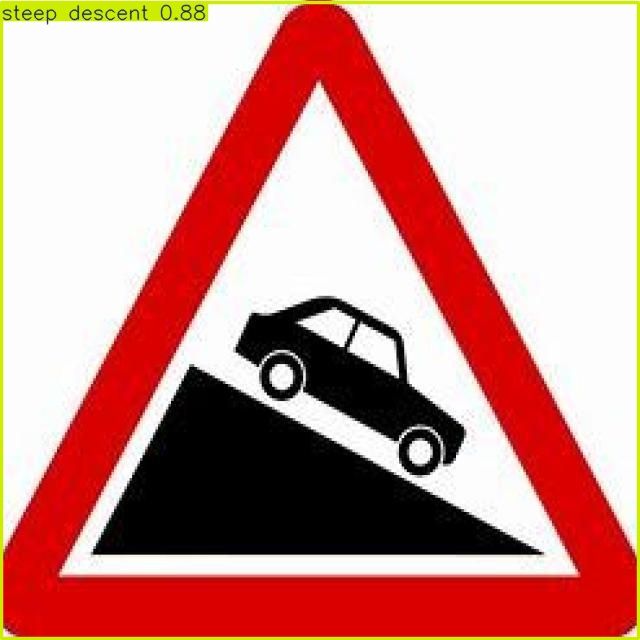


Full results saved in directory: runs/detect/predict2


In [9]:
# --- Need these imports ---
import os
from IPython.display import display, Image
# --- End Imports ---

# --- ASSUMPTIONS ---
# 1. Your trained YOLO model is loaded into a variable named 'model'

# 1. Specify the path to the single image you want to test
single_image_path = '/content/datasets2/Indian-Traffic-Signboards--5/valid/images/steep_descent-42_jpg.rf.03eacb4185d382fb80ab81597e82b941.jpg' # Path updated!

# 2. Perform prediction on the single image
try:
    # Use the existing 'model' object
    # save=True will save the output image in runs/detect/predictX
    # conf=0.5 sets the confidence threshold
    results = model.predict(source=single_image_path, save=True, conf=0.5)
except FileNotFoundError:
    print(f"Error: Image file not found at '{single_image_path}'.")
    print("Please ensure the file exists and the path is correct.")
    results = None
except NameError:
    print("Error: The 'model' variable is not defined.")
    print("Please ensure you have loaded the model into a variable named 'model' first.")
    results = None


# 3. Process and display the results for the single image
if results:
    # results is a list containing one Results object for the single image
    r = results[0]
    # Now 'os' is defined
    print(f"\n--- Detections for: {os.path.basename(r.path)} ---")
    boxes = r.boxes  # Get bounding box results

    if len(boxes) == 0:
        print("No traffic signs detected with confidence >= 0.5")
    else:
        # Loop through detected boxes
        for i in range(len(boxes)):
            class_id = int(boxes.cls[i])
            class_name = model.names[class_id] # Get name using the loaded model's map
            confidence = float(boxes.conf[i])
            coords = boxes.xyxy[i].tolist()

            print(f"Detected Sign: '{class_name}' (ID: {class_id})")
            print(f"  Confidence: {confidence:.2f}")
            print(f"  Bounding Box (xyxy): [{coords[0]:.1f}, {coords[1]:.1f}, {coords[2]:.1f}, {coords[3]:.1f}]")
            print("-" * 10)

    # Display the saved image with detections
    saved_image_path = os.path.join(r.save_dir, os.path.basename(r.path))
    if os.path.exists(saved_image_path):
         print(f"\nDisplaying saved image with detections from: {saved_image_path}")
         # Now 'display' and 'Image' should be defined
         display(Image(filename=saved_image_path))
    else:
         print(f"\nCould not find saved image at {saved_image_path}, but results were processed.")

    print(f"\nFull results saved in directory: {r.save_dir}")